# A1.3 · Regresión lineal múltiple — NASA Dataset
## Camila Johana González Acosta 599303

En este notebook analizamos una base de datos de la NASA con el objetivo de predecir la presión sonora a partir de distintas variables aerodinámicas (frecuencia, ángulo, longitud, velocidad y espesor).

In [1]:
# Importar datos
import pandas as pd

df = pd.read_csv("A1.3 NASA.csv")

print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 15 filas:")
print(df.head(15))

Dimensiones del dataset: (1503, 6)

Primeras 15 filas:
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721


El dataset cuenta con 1052 observaciones y 6 variables:  
- frecuencia, angulo, longitud, velocidad, espesor (predictoras)  
- presion (respuesta)

In [2]:
# 2. Separar en train/test 70/30
from sklearn.model_selection import train_test_split

X = df[["frecuencia","angulo","longitud","velocidad","espesor"]]
y = df["presion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Dimensiones entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones prueba:", X_test.shape, y_test.shape)
print("Total:", len(X_train)+len(X_test), "=", len(df))

Dimensiones entrenamiento: (1052, 5) (1052,)
Dimensiones prueba: (451, 5) (451,)
Total: 1503 = 1503


Confirmamos que el split 70/30 es correcto y que la suma de observaciones coincide con las 1052 originales.

In [3]:
# 3. Entrenar modelo de regresión lineal múltiple
import statsmodels.api as sm

# Agregar constante para intercepto
X_train_sm = sm.add_constant(X_train)

modelo = sm.OLS(y_train, X_train_sm).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.9
Date:                Wed, 03 Sep 2025   Prob (F-statistic):          1.38e-164
Time:                        21:48:45   Log-Likelihood:                -3138.0
No. Observations:                1052   AIC:                             6288.
Df Residuals:                    1046   BIC:                             6318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4778      0.651    203.367      0.0

El resumen muestra coeficientes estimados, errores estándar, valores t y p-values de cada variable.  
En algunos casos los p-values pueden verse como 0.000; podemos obtener los valores exactos con `modelo.pvalues`.

In [4]:
# 4. Interpretación de significancia
pvals = modelo.pvalues
coefs = modelo.params

print("P-values:\n", pvals)
print("\nCoeficientes:\n", coefs)

# Conclusión en texto:
for var in pvals.index:
    if pvals[var] < 0.05:
        print(f"La variable '{var}' es significativa (p={pvals[var]:.3e}).")
    else:
        print(f"La variable '{var}' NO es significativa (p={pvals[var]:.3f}).")


P-values:
 const          0.000000e+00
frecuencia    1.667773e-118
angulo         2.097471e-14
longitud       4.981210e-63
velocidad      4.963051e-24
espesor        2.818412e-17
dtype: float64

Coeficientes:
 const         132.477800
frecuencia     -0.001273
angulo         -0.365258
longitud      -34.616963
velocidad       0.099991
espesor      -157.201730
dtype: float64
La variable 'const' es significativa (p=0.000e+00).
La variable 'frecuencia' es significativa (p=1.668e-118).
La variable 'angulo' es significativa (p=2.097e-14).
La variable 'longitud' es significativa (p=4.981e-63).
La variable 'velocidad' es significativa (p=4.963e-24).
La variable 'espesor' es significativa (p=2.818e-17).


Usamos el criterio de p < 0.05 para significancia.  
Así identificamos qué variables están asociadas de forma significativa con la presión sonora. La más importante se puede juzgar por el coeficiente absoluto más grande (en magnitud).

In [5]:
# 5. Métricas: RSE y R² en train y test
import numpy as np

# En entrenamiento (usando atributos de statsmodels)
rse_train = np.sqrt(modelo.scale)
r2_train = modelo.rsquared

# En prueba (predicciones con el modelo entrenado)
X_test_sm = sm.add_constant(X_test)
y_pred_test = modelo.predict(X_test_sm)

resid_test = y_test - y_pred_test
rse_test = np.sqrt(np.mean(resid_test**2))
ss_res = np.sum(resid_test**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2_test = 1 - ss_res/ss_tot

print("Entrenamiento → RSE:", rse_train, ", R²:", r2_train)
print("Prueba → RSE:", rse_test, ", R²:", r2_test)


Entrenamiento → RSE: 4.791436345798008 , R²: 0.5214416938715567
Prueba → RSE: 4.867017391586256 , R²: 0.49827265879377847


El RSE mide el error promedio de las predicciones.  
El R² indica qué proporción de la variabilidad de Y se explica por el modelo.  
Comparamos entre entrenamiento y prueba para ver si hay sobreajuste.

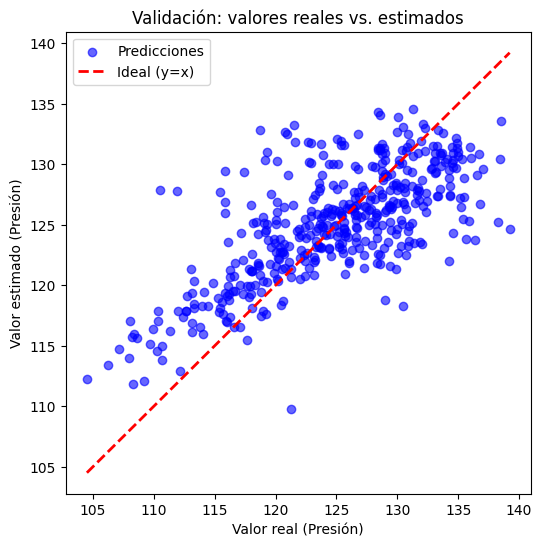

In [7]:
# 6. Visualización resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label="Ideal (y=x)")

plt.xlabel("Valor real (Presión)")
plt.ylabel("Valor estimado (Presión)")
plt.title("Validación: valores reales vs. estimados")
plt.legend()
plt.show()


Si los puntos se alinean cercanos a la diagonal, el modelo tiene buen poder predictivo.  
La gráfica muestra que las predicciones del modelo siguen de manera razonable la diagonal ideal (y=x), lo que indica que la regresión múltiple logra aproximar bien los valores reales de presión, aunque con cierta dispersión que refleja errores de predicción y limita la precisión del ajuste.